<a href="https://colab.research.google.com/github/Hamiltonfelipe/Hamilton-Felipe/blob/main/trabalho_de_dados_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Estruturando a tabela

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [2]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [3]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos= pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [4]:
engine= create_engine('sqlite:///:memory:')

In [5]:
produtos.to_sql('produtos', engine, index = False) # retorna a quatidade de linhas

205

In [6]:
itens_pedidos.to_sql('itens_pedidos', engine, index = False)

24527

In [7]:
pedidos.to_sql('pedidos', engine, index = False)

24527

In [8]:
vendedores.to_sql('vendedores', engine, index = False)

5

In [9]:
inspetor= inspect(engine)
print(inspetor.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializado, analisando a **condição** dos produtos vendidos.

In [10]:
query= 'SELECT CONDICAO FROM PRODUTOS'

In [11]:
with engine.connect() as conex:
  consulta= conex.execute(text(query))
  dados= consulta.fetchall()#coleta todos os dados da consulta e converte em listas ou tuplas

pd.DataFrame(dados, columns= consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [12]:
def consulta_sql(query): #transformando o codigo em uma função
  with engine.connect() as conex:
    consulta= conex.execute(text(query))
    dados= consulta.fetchall()

  return pd.DataFrame(dados, columns= consulta.keys())

In [13]:
condição= 'SELECT CONDICAO, COUNT(*) FROM PRODUTOS GROUP BY CONDICAO'
consulta_sql(condição)

,Condicao,COUNT(*)
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


In [14]:
condição= '''SELECT CONDICAO AS 'Condição',COUNT(*) AS 'Quantidade'
 FROM PRODUTOS
 GROUP BY CONDICAO''' # aspas triplas serve para 'quebrar' o codigo
consulta_sql(condição)

,Condição,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


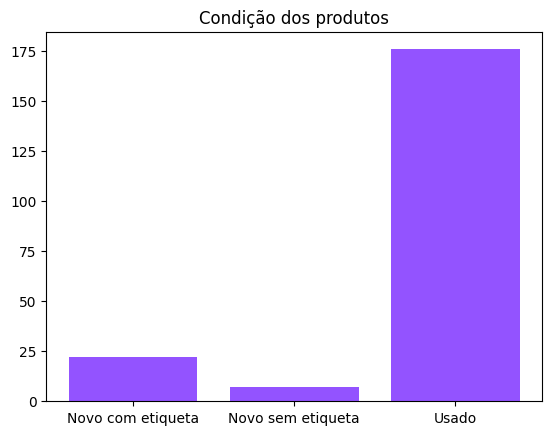

In [15]:
plt.bar(consulta_sql(condição)['Condição'], consulta_sql(condição)['Quantidade'], color= '#9353FF')
plt.title('Condição dos produtos')
plt.show()

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [16]:
consulta_sql('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [17]:
consulta_sql('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [18]:
relacao= ''' SELECT  PRODUTOS.produto,
SUM(ITENS_PEDIDOS.quantidade) AS quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.produto_id= PRODUTOS.produto_id
GROUP BY PRODUTOS.produto
'''  # LIMIT, é uma função que limita a quantidade de dados retornados em uma consulta, e a função OFFSET marca um 'ponto de partida'
consulta_sql(relacao)

,produto,quantidade
0,Bata Pink Decote,459
1,Bermuda Acetinada Preta,363
2,Bermuda Jeans Lavagem,395
3,Bermuda Listras Bolsos,402
4,Blazer Alfaiataria Grafite,433
...,...,...
196,Vestido Seda Floral,428
197,Vestido Textura Branco,470
198,Vestido Verde Estampa,423
199,Vestido Xadrez Pb,384


Ordenando os dados

In [19]:
ordenando= ''' SELECT  PRODUTOS.produto,
SUM(ITENS_PEDIDOS.quantidade) AS quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.produto_id= PRODUTOS.produto_id
GROUP BY PRODUTOS.produto
ORDER BY quantidade ASC
'''  # DESC= ordem decrescente e ASC= ordem ascendente ou crescente
consulta_sql(ordenando)

,produto,quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


In [20]:
ordem= consulta_sql(ordenando)

Text(0.5, 0, 'Quantidade de itens vendidos')

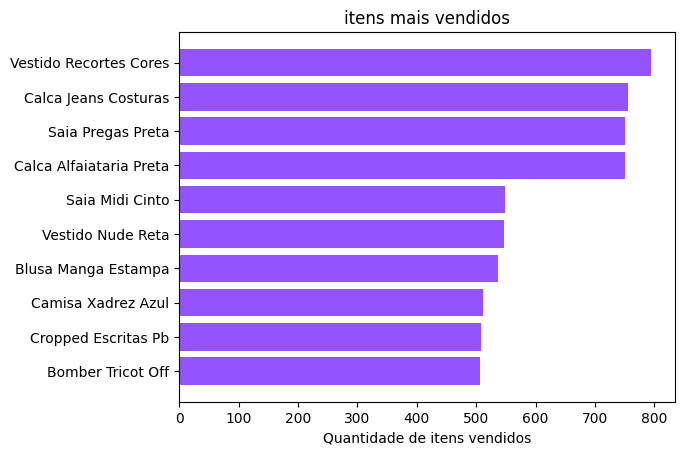

In [21]:
plt.barh(ordem['produto'][-10:], ordem['quantidade'][-10:], color='#9353FF') # [x:] limita o número de dados selecionados
plt.title('itens mais vendidos')
plt.xlabel('Quantidade de itens vendidos')

In [22]:
consulta_sql('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


##Quantidade e valor total de vendas

In [23]:
valor_t=''' SELECT  SUM(quantidade) AS quantidade,
SUM(ITENS_PEDIDOS.valor_total) AS 'valor total'
FROM ITENS_PEDIDOS
'''

In [24]:
consulta_sql(valor_t)

,quantidade,valor total
0,85774,45803930


Marcas mais vendidas

In [25]:
marcas= ''' SELECT PRODUTOS.marca,
SUM(ITENS_PEDIDOS.quantidade) AS quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.produto_id= PRODUTOS.produto_id
GROUP BY PRODUTOS.marca
ORDER BY quantidade DESC
'''

In [26]:
consulta_sql(marcas).head(3)

,marca,quantidade
0,Zara,9545
1,Mixed,5748
2,Animale,4013


In [27]:
M_P=consulta_sql(marcas).head(15)
M_P

,marca,quantidade
0,Zara,9545
1,Mixed,5748
2,Animale,4013
3,Le Lis Blanc,2479
4,Banana Republic,2045
5,Farm,1779
6,H&m,1576
7,Shoulder,1317
8,Sacada,1285
9,Dress&co,1262


Text(0.5, 0, 'Quantidade de itens vendidos')

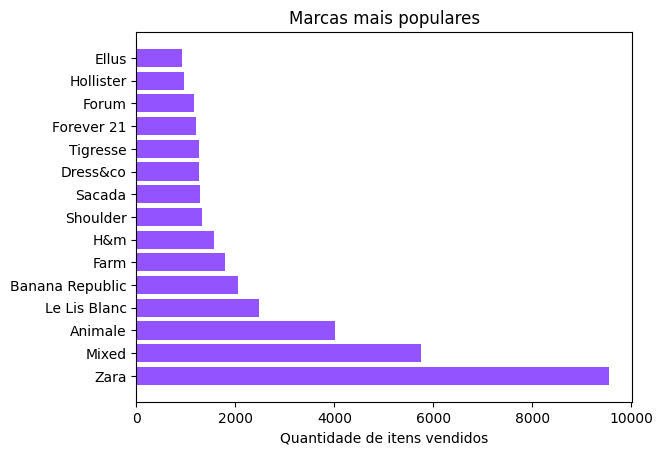

In [28]:
plt.barh(M_P['marca'], M_P['quantidade'], color='#9353FF')
plt.title('Marcas mais populares')
plt.xlabel('Quantidade de itens vendidos')

In [29]:
resolvido = '''SELECT PRODUTOS.MARCA, COUNT (*) AS 'Pedidos'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) ASC;
'''
#agrupamos elas por frequência através da função COUNT

In [30]:
M_P1=consulta_sql(resolvido)

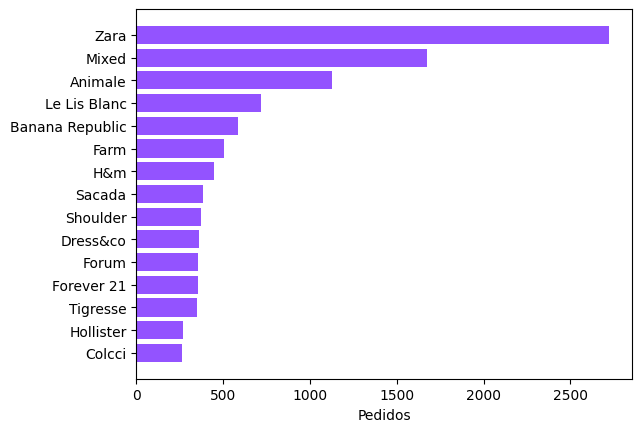

In [31]:
plt.barh(M_P1['marca'][-15:], M_P1['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** . A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [32]:
consulta_sql('SELECT *  FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [33]:
consulta_sql('SELECT *  FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [34]:
tempo= '''SELECT *
FROM PEDIDOS
WHERE strftime('%Y', data_compra)= '2020';

''' #% Y=year, ou seja ano, data_compra = nome da coluna q estamos utilizando, por estarmos comparando textos 2020 deve esta entre aspas

In [35]:
consulta_sql(tempo)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,112772,84743,3,2020-01-01,720
1,112909,56350,3,2020-01-01,1225
2,113068,70673,2,2020-01-01,1050
3,113453,16634,3,2020-01-01,2880
4,114487,43054,1,2020-01-01,640
...,...,...,...,...,...
14540,26762,9981,4,2020-12-31,8000
14541,27016,20029,3,2020-12-31,1764
14542,27666,12895,5,2020-12-31,10400
14543,28206,29893,4,2020-12-31,2100


In [36]:
vendas= '''SELECT vendedor_id,
COUNT(*) AS quantidade_vendas
FROM PEDIDOS
WHERE strftime('%Y', data_compra)= '2020'
GROUP BY vendedor_id
'''
consulta_sql(vendas)

,vendedor_id,quantidade_vendas
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [37]:
vendedores= '''SELECT VENDEDORES.nome_vendedor AS 'Vendedor',
COUNT(PEDIDOS.pedido_id) AS 'quantidade de vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra)= '2020' AND VENDEDORES.vendedor_id= PEDIDOS.vendedor_id
GROUP BY VENDEDORES.nome_vendedor
ORDER BY 'quantidade de vendas' DESC;
'''
consulta_sql(vendedores)

,Vendedor,quantidade de vendas
0,Paulo Calanca,2488
1,Nadia Oliveira,2782
2,Millena Pereira,2510
3,Daniel Siqueira,3338
4,Ana Duarte,3427


<font size=6 font/> COUNT() <font>

É uma função de agregação que conta o número de linhas ou valores não nulos em uma coluna ou conjunto de valores e retorna um valor inteiro. Por isso, é usada para determinar a quantidade de registros que satisfazem determinadas condições em uma consulta.

In [38]:
média= '''SELECT VENDEDORES.nome_vendedor AS 'Vendedor',
AVG(PEDIDOS.total) AS 'valor médio de vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra)= '2020' AND VENDEDORES.vendedor_id= PEDIDOS.vendedor_id
GROUP BY VENDEDORES.nome_vendedor
ORDER BY 'valor médio de vendas' DESC;
'''
consulta_sql(média)

,Vendedor,valor médio de vendas
0,Paulo Calanca,1813.469855
1,Nadia Oliveira,1818.342200
2,Millena Pereira,1894.614343
3,Daniel Siqueira,1972.338526
4,Ana Duarte,1843.452582


<font size=6 font/> AVG()<font>

É uma função que calcula a média aritmética de um conjunto de valores. Ela pode ser aplicada a colunas numéricas, como valores inteiros ou decimais. Ela ignora valores nulos durante o cálculo da média.

Produtos mais vendido

In [39]:
mais_v= '''  SELECT PRODUTOS.produto,
COUNT(*) AS quantidade
FROM PRODUTOS
INNER JOIN ITENS_PEDIDOS ON PRODUTOS.produto_id= ITENS_PEDIDOS.produto_id
INNER JOIN PEDIDOS ON ITENS_PEDIDOS.produto_id= PEDIDOS.produto_id
WHERE strftime('%Y', PEDIDOS.data_compra )= '2019'
GROUP BY PRODUTOS.produto
ORDER BY quantidade DESC
'''
consulta_sql(mais_v).head(10)

,produto,quantidade
0,Vestido Recortes Cores,9723
1,Calca Jeans Costuras,9272
2,Camisa Xadrez Azul,8640
3,Bomber Tricot Off,8288
4,Saia Midi Cinto,8162
5,Saia Pregas Preta,8065
6,Blusa Manga Estampa,7938
7,Shorts Bordado Branco,7700
8,Calca Alfaiataria Preta,7460
9,Saia Evase Cinza,7314


In [40]:
consulta_sql('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [41]:
consulta_sql('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [42]:
Receita= ''' SELECT strftime('%m', data_compra) AS mes, SUM(total) AS Receita
FROM PEDIDOS
WHERE strftime('%Y', data_compra)= '2021'
GROUP BY mes
'''
consulta_sql(Receita)

,mes,Receita
0,01,2097109
1,02,1140729
2,03,51525


In [43]:
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM pedidos
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes;
'''
consulta_sql(query)

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


# 4. Avançando nas relações

analisando se o estadi São Paulo já rende muitas vendas em relação a outros estados?

In [44]:
Estado=''' SELECT estado, COUNT(*) AS pedidos
FROM ITENS_PEDIDOS
GROUP BY estado
ORDER BY pedidos DESC
'''
consulta_sql(Estado)

,Estado,pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


Uma das ações que se pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [45]:
vendedores_SP= ''' SELECT PEDIDOS.vendedor_id, COUNT(*) AS Vendas
FROM PEDIDOS
JOIN ITENS_PEDIDOS ON PEDIDOS.pedido_id= ITENS_PEDIDOS.pedido_id
WHERE ITENS_PEDIDOS.estado= 'BR-SP'
GROUP BY PEDIDOS.vendedor_id
ORDER BY Vendas DESC
'''
consulta_sql(vendedores_SP)

,vendedor_id,Vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


In [46]:
vendedores_SP= ''' SELECT VENDEDORES.nome_vendedor, COUNT(*) AS Vendas
FROM PEDIDOS
JOIN VENDEDORES ON PEDIDOS.vendedor_id= VENDEDORES.vendedor_id
JOIN ITENS_PEDIDOS ON PEDIDOS.pedido_id= ITENS_PEDIDOS.pedido_id
WHERE ITENS_PEDIDOS.estado= 'BR-SP'
GROUP BY VENDEDORES.nome_vendedor
ORDER BY Vendas DESC
'''
consulta_sql(vendedores_SP)

,nome_vendedor,Vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


In [47]:
consulta_sql('SELECT * FROM PRODUTOS')

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [48]:
consulta_sql('SELECT * FROM PEDIDOS')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [50]:
marcas_sp= ''' SELECT PRODUTOS.marca, COUNT(*) AS popularidade
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON PRODUTOS.produto_id= ITENS_PEDIDOS.produto_id
WHERE ITENS_PEDIDOS.estado= 'BR-SP'
GROUP BY PRODUTOS.marca
ORDER BY popularidade DESC
'''
consulta_sql(marcas_sp).head(10)

,marca,popularidade
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
5,Shoulder,17
6,Sacada,17
7,Forever 21,15
8,Cantão,15
9,Fyi,14


### Vendas no Natal

In [51]:
produtos_natal= ''' SELECT PRODUTOS.produto, COUNT(*) AS melhor_natal
FROM PRODUTOS
JOIN PEDIDOS ON PRODUTOS.produto_id= PEDIDOS.produto_id
WHERE strftime('%m', data_compra) = '12'
GROUP BY PRODUTOS.produto
ORDER BY melhor_natal DESC
'''
consulta_sql(produtos_natal).head(10)

,produto,melhor_natal
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
5,Saia Couro Tijolo,22
6,Cropped Listras Florzinhas,22
7,Calca Alfaiataria Rose,22
8,Vestido Longo Preto,21
9,Vestido Textura Branco,20
